In [5]:
!pip install vaderSentiment

You should consider upgrading via the 'c:\users\gsdav\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import time
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import numpy as np
from monkeylearn import MonkeyLearn
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [7]:
analyser.polarity_scores("The movie is good")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [8]:
analyser.polarity_scores("The movie is bad")

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [9]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    score = score['compound']
    return score
#    if lb >= 0.05:
#        return 1
#    elif (lb > -0.05) and (lb < 0.05):
#        return 0
#    else:
#        return -1

In [10]:
sentiment_analyzer_scores("The movie is VERY BAD!!!")

-0.7984

In [11]:
sentiment_analyzer_scores("The movie is VERY GOOD!!!")

0.7604

In [12]:
sentiment_analyzer_scores("The movie is long")

0.0

In [13]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

In [14]:
import sys
import tweepy
import csv

In [15]:
consumer_key = 'DAuDRmCqFxyWIOfIXOOedJC3Z'
consumer_secret = 'PvL65HPCmXXq2si0TVOTJ97z0H6QWUUKWCOfHDfsDfHeetHcO9'
access_token = '11455702-VVRvSkXiNPLiJuaC4VAP52d8xXlYYd8WiGsPHe5jl'
access_token_secret = 'O27Ea3o9mnqPofdfovqn1nNhhKcOA3DRvoiGW2Qtu8mPB'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [16]:
tweets = api.user_timeline('@JoeBiden', count=5, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

You deserve a President and Vice President who will spend every minute of every day working to make your life better.

I promise that’s exactly what @KamalaHarris and I will do.

Always remember. https://t.co/BwaBSo8LFq

And now, as then, we owe it to them to come together as a nation — so that Americans can once again do what we did so bravely nineteen years ago: turn from tragedy to purpose, rebuild our lives, and begin, in time, to heal.

Now, as then, our heroes are ordinary people doing extraordinary things: nurses and doctors; delivery drivers and grocery clerks; public transit workers and educators; regular Americans thrust into courageous acts of sacrifice and service.

This year, we mark the anniversary of 9/11 in the midst of another crisis that compels us to summon the best of the American people in the face of unconscionable, inconceivable loss — a crisis that has already taken nearly 200,000 Americans.



In [17]:
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [18]:
user_id = 'realDonaldTrump' 
count=200

In [19]:
tw_trump = list_tweets(user_id, count)

In [20]:
type(tw_trump)

list

In [21]:
tw_trump[2]

'Was Andy McCabe ever forced to pay back the $700,000 illegally given to him and his wife, for his wife’s political campaign, by Crooked Hillary Clinton while Hillary was under FBI investigation, and McCabe was the head of the FBI??? Just askin’?'

In [22]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [23]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    lst = np.vectorize(remove_pattern)(lst, "b'")
    lst = np.vectorize(remove_pattern)(lst, "x##")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [24]:
tw_trump = clean_tweets(tw_trump)

In [25]:
tw_trump[2]

'Was Andy McCabe ever forced to pay back the $700,000 illegally given to him and his wife, for his wife’s political campaign, by Crooked Hillary Clinton while Hillary was under FBI investigation, and McCabe was the head of the FBI??? Just askin’?'

In [26]:
sentiment_analyzer_scores(tw_trump[2])

-0.6553

In [27]:
def anl_tweets(lst, title='Tweets Sentiment'):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=10)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

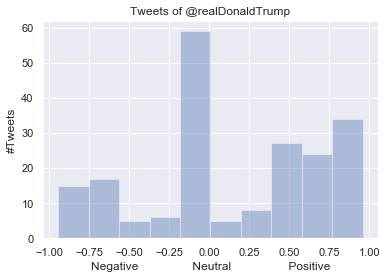

In [28]:
tw_trump_sent = anl_tweets(tw_trump, user_id)

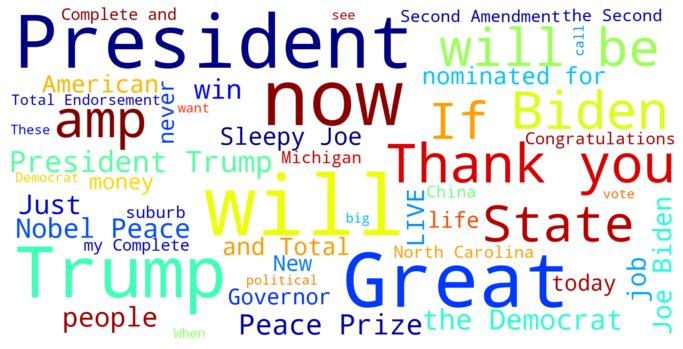

In [29]:
word_cloud(tw_trump)

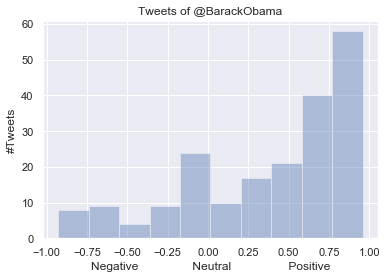

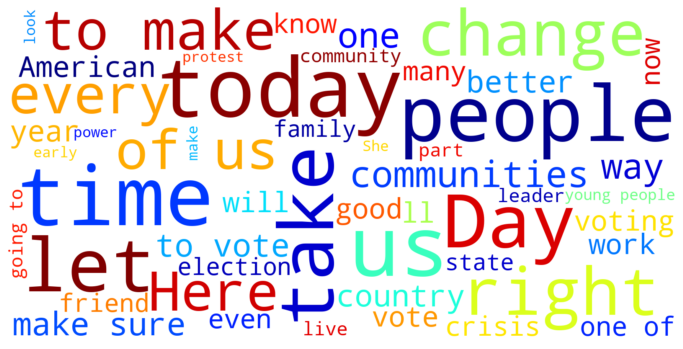

In [30]:
user_id = 'BarackObama' 
tw_obama = list_tweets(user_id, count)
tw_obama = clean_tweets(tw_obama)
tw_obama_sent = anl_tweets(tw_obama, user_id)
word_cloud(tw_obama)

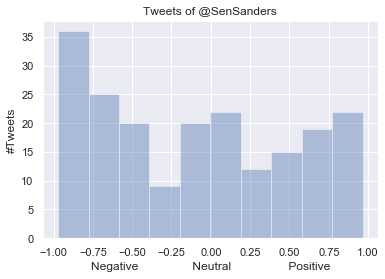

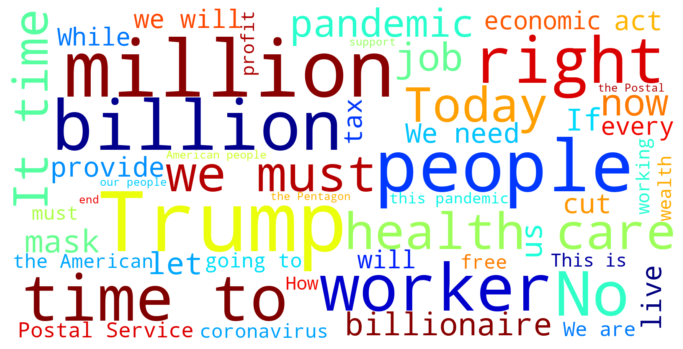

In [31]:
user_id = 'SenSanders' 
tw_sanders = list_tweets(user_id, count)
tw_sanders = clean_tweets(tw_sanders)
tw_sanders_sent = anl_tweets(tw_sanders, user_id)
word_cloud(tw_sanders)

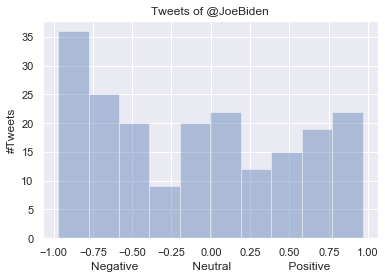

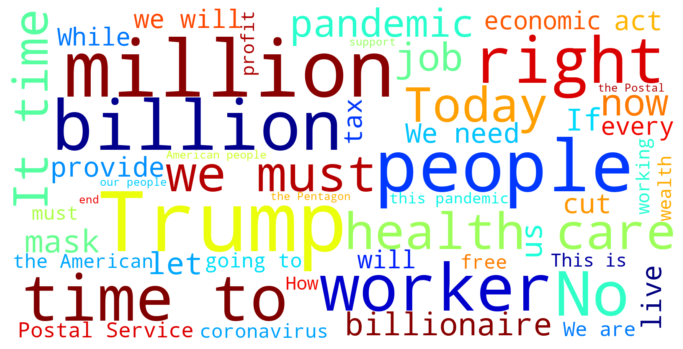

In [32]:
user_id = 'JoeBiden' 
tw_binden = list_tweets(user_id, count)
tw_biden = clean_tweets(tw_sanders)
tw_biden_sent = anl_tweets(tw_sanders, user_id)
word_cloud(tw_biden)

In [33]:
print(tw_sanders)

['A half million people in Oregon evacuate as wildfires rage. Over 3 million acres in California burned. The western sky is red. An 800-mile derecho destroyed towns in Iowa. The Arctic topped 100 degrees. \n\nThe Green New Deal has been called "expensive." \n\nCompared to what?'
 'Today we remember the nearly 3,000 lives lost on 9/11 and the brave people who risked their lives to help that day. Those selfless acts of sacrifice show the very best of us as a nation, and we can honor that sacrifice by working to build a world of security and dignity for all.'
 'Instead of providing more corporate welfare to billionaires and large corporations, we need to provide more financial relief to the tens of millions of Americans who are hurting like they have never hurt before. '
 'While Amazon raised prices by up to 1,000% on masks, soap &amp; toilet paper, Jeff Bezos became $88 billion richer and continues to deny workers paid sick leave &amp; hazard pay. That is morally obscene. Billionaires sh

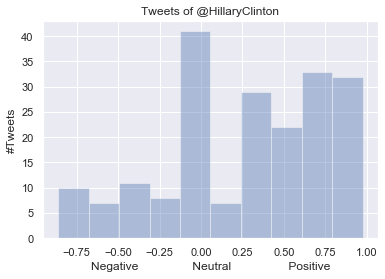

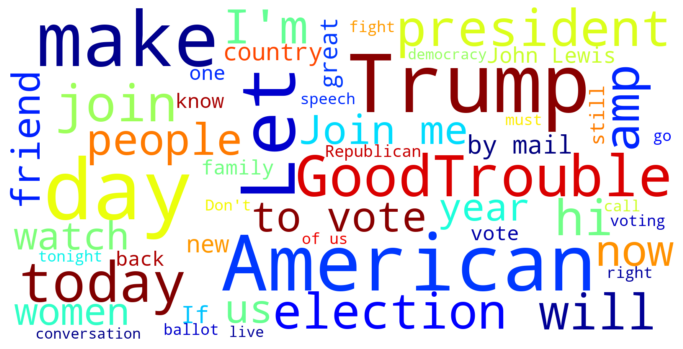

In [34]:
user_id = 'HillaryClinton'
tw_hillary = list_tweets(user_id, count)
tw_hillary = clean_tweets(tw_hillary)
tw_hillary_sent = anl_tweets(tw_hillary, user_id)
word_cloud(tw_hillary)

In [30]:
import os 
os.chdir ("C:\\Users\gsdav\Documents\Data\RStatistics\Projects\mueller-report-master\mueller-report-master")

retval = os.getcwd()
print("Current working directory %s" % retval)

Current working directory C:\Users\gsdav\Documents\Data\RStatistics\Projects\mueller-report-master\mueller-report-master


In [31]:
def twitter_stream_listener(file_name,
                            filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
    class CustomStreamListener(tweepy.StreamListener):
        def __init__(self, time_limit):
            self.start_time = time.time()
            self.limit = time_limit
            # self.saveFile = open('abcd.json', 'a')
            super(CustomStreamListener, self).__init__()
        def on_status(self, status):
            if (time.time() - self.start_time) < self.limit:
                print(".", end="")
                # Writing status data
                with open(file_name, 'a', encoding="utf-8") as f:
                    writer = csv.writer(f)
                    writer.writerow([
                        status.author.screen_name, status.created_at,
                        status.text
                        #status.text.encode("utf-8")
                    ])
            else:
                print("\n\n[INFO] Closing file and ending streaming")
                return False
        def on_error(self, status_code):
            if status_code == 420:
                print('Encountered error code 420. Disconnecting the stream')
                # returning False in on_data disconnects the stream
                return False
            else:
                print('Encountered error with status code: {}'.format(
                    status_code))
                return True  # Don't kill the stream
        def on_timeout(self):
            print('Timeout...')
            return True  # Don't kill the stream
# Writing csv titles
    print(
        '\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'
        .format(file_name, time_limit, filter_track))
    with open(file_name, 'w', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(['author', 'date', 'text'])
    streamingAPI = tweepy.streaming.Stream(
        auth, CustomStreamListener(time_limit=time_limit))
    streamingAPI.filter(
        track=filter_track,
        follow=follow,
        locations=locations,
        languages=languages,
    )
    f.close()

In [32]:
filter_track = ['trump', 'mueller']
file_name = 'tweets_trump_wall.csv'
twitter_stream_listener (file_name, filter_track, time_limit=60)


[INFO] Open file: [tweets_trump_wall.csv] and starting 60 seconds of streaming for ['trump', 'mueller']

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [33]:
file_name = 'tweets_trump_wall.csv'
df_tws = pd.read_csv(file_name)
df_tws.shape

(1865, 3)

In [34]:
df_tws.head()

,author,date,text
0,muckshifter631,2019-04-28 18:51:12,RT @politics_tory: Speaker John Bercow has snu...
1,djdun3,2019-04-28 18:51:12,RT @mikandynothem: Have you ever noticed women...
2,SillysWill1,2019-04-28 18:51:12,RT @OMGno2trump: The days of being outraged ar...
3,MaggieWdowiak,2019-04-28 18:51:12,RT @SaraCarterDC: .@JohnBrennan pushed back Fr...
4,FakeNewsHuntres,2019-04-28 18:51:12,RT @SethAbramson: Trump and Jared face allegat...


In [35]:
df_tws['text'] =  clean_tweets(df_tws['text'])

In [36]:
df_tws.head()

,author,date,text
0,muckshifter631,2019-04-28 18:51:12,Speaker John Bercow has snubbed the Queen's i...
1,djdun3,2019-04-28 18:51:12,Have you ever noticed women who support #Trum...
2,SillysWill1,2019-04-28 18:51:12,The days of being outraged are over. I'm fig...
3,MaggieWdowiak,2019-04-28 18:51:12,. pushed back Friday on 's charge that he kne...
4,FakeNewsHuntres,2019-04-28 18:51:12,Trump and Jared face allegations they're coll...


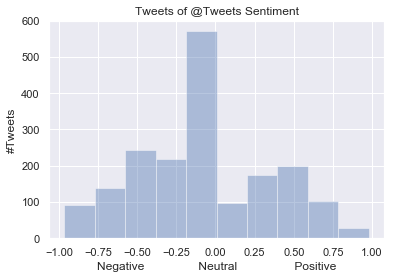

In [37]:
df_tws['sent'] = anl_tweets(df_tws.text)

In [38]:
df_tws.head()

,author,date,text,sent
0,muckshifter631,2019-04-28 18:51:12,Speaker John Bercow has snubbed the Queen's i...,-0.4588
1,djdun3,2019-04-28 18:51:12,Have you ever noticed women who support #Trum...,0.6908
2,SillysWill1,2019-04-28 18:51:12,The days of being outraged are over. I'm fig...,-0.8481
3,MaggieWdowiak,2019-04-28 18:51:12,. pushed back Friday on 's charge that he kne...,0.0000
4,FakeNewsHuntres,2019-04-28 18:51:12,Trump and Jared face allegations they're coll...,-0.2960


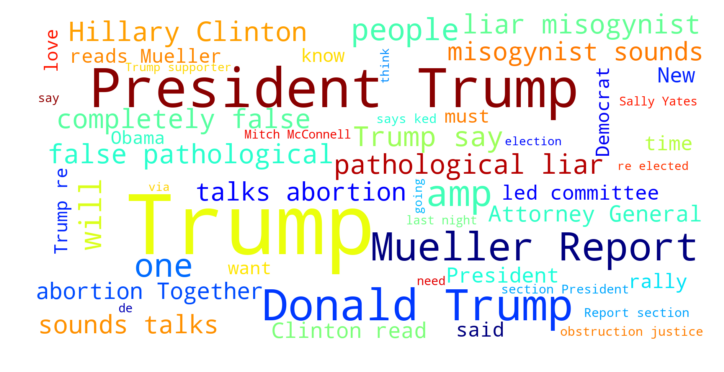

In [39]:
word_cloud(df_tws.text)

In [40]:
file_name = 'mueller_report.csv'
df_tws = pd.read_csv(file_name)
df_tws.shape

(19191, 3)

In [41]:
df_tws.head()

,page,line,text
0,1,1,U.S. Departme...
1,1,2,Ma1...
2,1,3,"AttarAe:,c\\'erlc Predtiet // Mtt; CeA1:ttiA\r"
3,1,4,Report On The Investigation Into\r
4,1,5,Russian InterferenceIn The\r


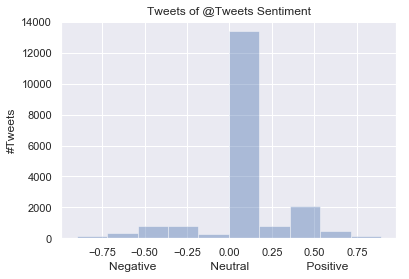

In [42]:
df_tws['sent'] = anl_tweets(df_tws.text)

In [54]:
type(tw_trump)

list

In [57]:
ml = MonkeyLearn('f7ba7d547500bd6188c0406223c7fb1f20595718')
data = tw_trump
model_id = 'cl_sGdE8hD9'
result = ml.classifiers.classify(model_id, data)
ml_df = read_json(result.body)
print(result.body)

PlanQueryLimitError: Error PLAN_QUERY_LIMIT: Request Throttled. You do not have enough queries left to perform this action. 200 queries are required, but you have 99 queries remaining.